# Assignment Python 2
### Nur Khofifah - PYTN-KS12-008

## Project Overview
Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.
Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

## Import Libraries

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns

## Loading Dataset

In [2]:
df = pd.read_csv('D:/Hacktiv8/nyc-rolling-sales.csv')

In [3]:
#Menampilkan 10 data dari atas
df.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [4]:
# Melihat jumlah baris dan kolom
df.shape

(84548, 22)

In [5]:
#Melihat Informasi struktur DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [6]:
#Melihat index berdasarkan kolom
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [7]:
# Melihat nilai unik pada data
for i in df.columns:
    print("\n", i)
    print(df[i].unique())



 Unnamed: 0
[    4     5     6 ... 26737 26738 26739]

 BOROUGH
[1 2 3 4 5]

 NEIGHBORHOOD
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND-PELHAM STRIP'
 'CO-OP CITY' 'COUNTRY CLUB' 'CROTONA PARK' 'EAST RIVER' 'EAST TREMONT'
 'FIELDSTON

['1633' '4616' '2212' ... '11088' '208033' '10796']

 GROSS SQUARE FEET
['6440' '18690' '7803' ... '977' '2683' '64117']

 YEAR BUILT
[1900 1913 1920 1910 2009 1925 1902 1928 1930 1935 1937 1915 1950 1929
 1901 1940 2005    0 1989 2014 2008 1965 2013 2003 2006 2007 1951 1899
 1850 1905 1864 1917 1911 1983 1926 1963 1960 1889 1898 1939 1938 1927
 1909 1958 1904 1907 1987 1931 1984 1948 2004 1918 1875 2012 1973 2011
 1922 2001 1932 1980 1908 1953 1906 2015 1946 1921 2010 1954 1111 1924
 1990 1890 1991 1988 1895 2016 1957 1986 1966 1998 1870 1923 1969 2017
 1968 1934 1956 1982 1914 1903 1967 1840 1912 1964 1955 1961 1851 2000
 1959 1962 1945 1972 1976 1916 1880 1970 1846 1941 1952 1896 1985 1981
 1888 1947 1975 1974 2002 1994 1892 1894 1891 1996 1997 1949 1999 1800
 1979 1971 1977 1942 1978 1826 1881 1919 1883 1936 1993 1995 1933 1992
 1943 1944 1847 1829 1844 1835 1852 1856 1854 1832 1845 1849 1855 1871
 1893 1865 1882 1680]

 TAX CLASS AT TIME OF SALE
[2 4 1 3]

 BUILDING CLASS AT TIME 

In [8]:
print(i)

SALE DATE


In [10]:
#Membuat variabel missing_values untuk menampung data missing values
missing_values = ['na','--','NaN','NA','n/a','?',' ','n-a',' -  ']
df = pd.read_csv('D:/Hacktiv8/nyc-rolling-sales.csv', na_values=missing_values)

In [11]:
print(missing_values)

['na', '--', 'NaN', 'NA', 'n/a', '?', ' ', 'n-a', ' -  ']


## Preprocessing Data

In [12]:
# Melihat data pada kolom unnamed dan kolom EASE-MENT yang merupakan data sampah 

df.drop(["Unnamed: 0", "EASE-MENT"], axis=1, inplace=True)

In [13]:
#Mengubah tipe data SALE DATE menjadi datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [14]:
df['SALE DATE']

0       2017-07-19
1       2016-12-14
2       2016-12-09
3       2016-09-23
4       2016-11-17
           ...    
84543   2016-11-28
84544   2017-04-21
84545   2017-07-05
84546   2016-12-21
84547   2016-10-27
Name: SALE DATE, Length: 84548, dtype: datetime64[ns]

In [15]:
#Mengubah tipe data menjadi numeric
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]
for col in numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [16]:
print(col)

SALE PRICE


In [17]:
#Mengubah tipe data menjadi categorical
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 
               'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    df[col] = df[col].astype("category")

In [18]:
#Mengecek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            83810 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83810 non-null  category      
 7   ADDRESS                         84548 non-null  object        
 8   APARTMENT NUMBER                19052 non-null  object        
 9   ZIP CODE                        84548 non-null  category      
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

In [19]:
#Mengecek missing value
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [20]:
#Mengecek data duplikat
df.duplicated().sum()

765

In [21]:
#Menghapus data duplikat
df.drop_duplicates(inplace=True)

In [22]:
#Menghapus kolom APARTMENT NUMBER 
df.drop(["APARTMENT NUMBER"], axis=1, inplace=True)

In [23]:
#Melihat skewness dari setiap kolom
df.skew(axis=0, skipna=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6304\1019434457.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew(axis=0, skipna=True)


BLOCK                  1.046322
LOT                    3.506785
RESIDENTIAL UNITS     62.058053
COMMERCIAL UNITS     224.990028
TOTAL UNITS           65.249327
LAND SQUARE FEET      75.762320
GROSS SQUARE FEET     61.121216
SALE PRICE           123.943132
dtype: float64

In [24]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

In [25]:
#Mengatasi missing values
#Tipe data kategori
replace_mode = ['TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT']
for col1 in replace_mode:
    df[col1].fillna(df[col1].mode(), inplace=True)

#Tipe data numerik
df["LAND SQUARE FEET"]=df["LAND SQUARE FEET"].fillna(df["LAND SQUARE FEET"].median())
df["GROSS SQUARE FEET"]=df["GROSS SQUARE FEET"].fillna(df["GROSS SQUARE FEET"].median())
df["SALE PRICE"]=df["SALE PRICE"].fillna(df["SALE PRICE"].median())

In [26]:
print(col1)

BUILDING CLASS AT PRESENT


In [27]:
#Mengecek kembali missing values
df.isna().sum()

BOROUGH                             0
NEIGHBORHOOD                        0
BUILDING CLASS CATEGORY             0
TAX CLASS AT PRESENT              738
BLOCK                               0
LOT                                 0
BUILDING CLASS AT PRESENT         738
ADDRESS                             0
ZIP CODE                            0
RESIDENTIAL UNITS                   0
COMMERCIAL UNITS                    0
TOTAL UNITS                         0
LAND SQUARE FEET                    0
GROSS SQUARE FEET                   0
YEAR BUILT                          0
TAX CLASS AT TIME OF SALE           0
BUILDING CLASS AT TIME OF SALE      0
SALE PRICE                          0
SALE DATE                           0
dtype: int64

In [28]:
#Menghapus data duplikat pada kolom YEAR BUILT
years = df["YEAR BUILT"].drop_duplicates()
years

0        1900
3        1913
6        1920
10       1910
11       2009
         ... 
33557    1871
39533    1893
44615    1865
45042    1882
81875    1680
Name: YEAR BUILT, Length: 158, dtype: category
Categories (158, int64): [0, 1111, 1680, 1800, ..., 2014, 2015, 2016, 2017]

In [29]:
#Melihat statistik data untuk data numeric 
df.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,8.378300e+04,8.378300e+04,8.378300e+04
mean,4242.903155,376.137415,1.999976,0.183677,2.213504,3.375438e+03,3.170620e+03,1.154192e+06
std,3568.789482,658.021286,16.569118,8.576582,18.777727,3.449485e+04,2.860114e+04,1.042234e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1326.000000,22.000000,0.000000,0.000000,1.000000,2.000000e+03,1.344000e+03,3.000000e+05
50%,3319.000000,50.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,5.330000e+05
75%,6295.000000,1001.000000,2.000000,0.000000,2.000000,2.650000e+03,2.080000e+03,8.350000e+05
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2.210000e+09


In [30]:
#Menghitung nilai 0 pada kolom YEAR BUILT, TOTAL UNIT, SALE PRICE
print("Nilai 0 pada YEAR BUILT: ",df[df['YEAR BUILT']==0]['YEAR BUILT'].count())
print("Nilai 0 pada TOTAL UNIT: ",df[df['TOTAL UNITS']==0]['TOTAL UNITS'].count())
print("Nilai 0 pada SALE PRICE: ",df[df['SALE PRICE']==0]['SALE PRICE'].count())

Nilai 0 pada YEAR BUILT:  6885
Nilai 0 pada TOTAL UNIT:  19677
Nilai 0 pada SALE PRICE:  10012


In [31]:
#Menghapus nilai 0 pada kolom YEAR BUILT, TOTAL UNIT, SALE PRICE
df['YEAR BUILT'].replace(0, np.nan, inplace=True)
df['TOTAL UNITS'].replace(0, np.nan, inplace=True)
df['SALE PRICE'].replace(0, np.nan, inplace=True)

In [32]:
#Mengecek kembali nilai 0 pada kolom YEAR BUILT, TOTAL UNIT, SALE PRICE
print("Nilai 0 pada YEAR BUILT: ",df[df['YEAR BUILT']==0]['YEAR BUILT'].count())
print("Nilai 0 pada TOTAL UNIT: ",df[df['TOTAL UNITS']==0]['TOTAL UNITS'].count())
print("Nilai 0 pada SALE PRICE: ",df[df['SALE PRICE']==0]['SALE PRICE'].count())

Nilai 0 pada YEAR BUILT:  0
Nilai 0 pada TOTAL UNIT:  0
Nilai 0 pada SALE PRICE:  0


In [33]:
#Menghapus missing values
df.dropna(inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51546 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         51546 non-null  category      
 1   NEIGHBORHOOD                    51546 non-null  category      
 2   BUILDING CLASS CATEGORY         51546 non-null  category      
 3   TAX CLASS AT PRESENT            51546 non-null  category      
 4   BLOCK                           51546 non-null  int64         
 5   LOT                             51546 non-null  int64         
 6   BUILDING CLASS AT PRESENT       51546 non-null  category      
 7   ADDRESS                         51546 non-null  object        
 8   ZIP CODE                        51546 non-null  category      
 9   RESIDENTIAL UNITS               51546 non-null  int64         
 10  COMMERCIAL UNITS                51546 non-null  int64         
 11  TO

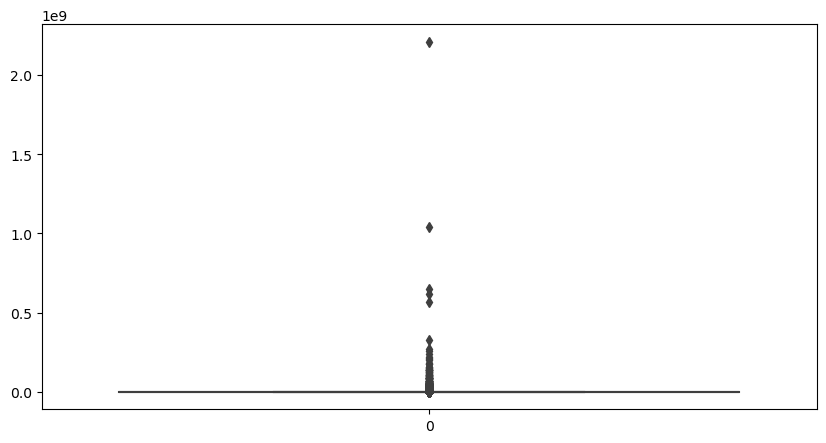

In [35]:
#Membuat boxplot untuk melihat outliers pada SALE PRICE
plt.figure(figsize=(10,5))
sns.boxplot(df["SALE PRICE"])
plt.show()

In [36]:
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 800000)]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33240 entries, 1 to 84545
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         33240 non-null  category      
 1   NEIGHBORHOOD                    33240 non-null  category      
 2   BUILDING CLASS CATEGORY         33240 non-null  category      
 3   TAX CLASS AT PRESENT            33240 non-null  category      
 4   BLOCK                           33240 non-null  int64         
 5   LOT                             33240 non-null  int64         
 6   BUILDING CLASS AT PRESENT       33240 non-null  category      
 7   ADDRESS                         33240 non-null  object        
 8   ZIP CODE                        33240 non-null  category      
 9   RESIDENTIAL UNITS               33240 non-null  int64         
 10  COMMERCIAL UNITS                33240 non-null  int64         
 11  TO

In [40]:
#Melakukan encode pada kolom BOROUGH
df['BOROUGH']= df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31.0,4616.0,18690.0,1900,2,C7,533000.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17.0,2212.0,7803.0,1900,2,C7,533000.0,2016-12-09
5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,10009,20,0,20.0,2581.0,9730.0,1900,2,C4,533000.0,2017-07-20
7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,C7,520 EAST 14TH STREET,10009,44,2,46.0,5163.0,21007.0,1900,2,C7,533000.0,2017-07-20
8,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,141 AVENUE D,10009,15,0,15.0,1534.0,9198.0,1920,2,D5,533000.0,2017-06-20


## Descriptive Statistics

### Measure of Central Tendency: Mean

In [41]:
#Menghitung nilai mean SALE PRICE pada setiap data di kolom BOROUGH
mean_price = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True)
mean_price

,SALE PRICE
BOROUGH,
Bronx,454719.496226
Staten Island,479749.732431
Queens,518863.461569
Brooklyn,531021.716746
Manhattan,551868.071038


<Axes: xlabel='BOROUGH'>

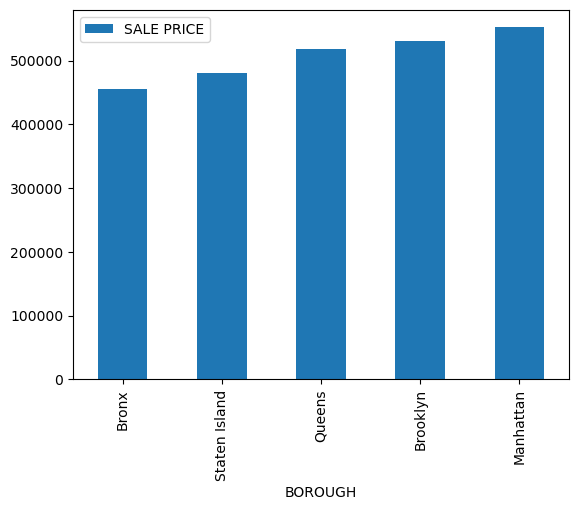

In [42]:
mean_price.plot(kind='bar')

In [43]:
#Menghitung nilai mean pada setiap data di kolom BOROUGH
mean_all = df.groupby('BOROUGH').mean()
mean_all

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6304\3803309064.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_all = df.groupby('BOROUGH').mean()


,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,1162.025715,1046.780135,5.309225,0.945034,6.371906,2941.598843,8586.459981,551868.071038
Bronx,4229.494257,118.194289,2.068592,0.046275,2.114539,2620.252379,2278.153922,454719.496226
Brooklyn,5154.577713,371.171405,1.754513,0.058726,1.822992,1981.770284,1704.962440,531021.716746
Queens,7722.878476,229.919006,2.207634,0.225866,2.466881,3921.786136,2888.354014,518863.461569
Staten Island,3261.245902,215.497933,1.288952,0.058731,1.350677,4296.569779,1872.173913,479749.732431


<Axes: xlabel='BOROUGH'>

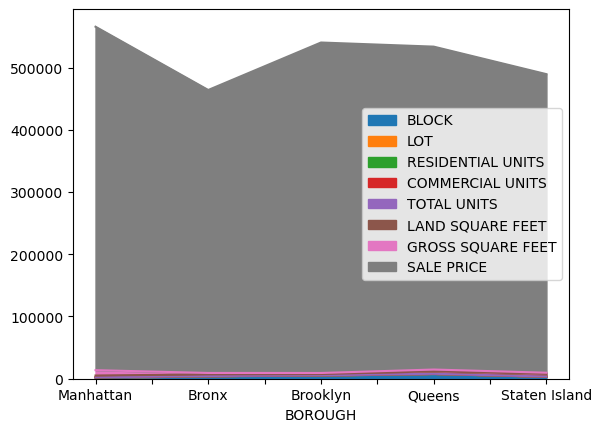

In [44]:
mean_all.plot(kind='area')

### Kesimpulan:
Berdasarakan hasil tabel df.groupby('BOROUGH').mean().

Dapat disimpulkan :
 - Manhattan memiliki nilai rata rata tertinggi pada LOT, RESIDENTIAL UNITS, COMMERCIAL UNITS, TOTAL UNITS, GROSS SQUARE FEET, dan SALE PRICE
 - Queens memiliki nilai rata rata tertingi pada BLOCK.
 - Staten Island memiliki nilai rata rata tertingi pada LAND SQUARE FEET.


### Measure of Central Tendency: Median

In [45]:
#Menghitung nilai median SALE PRICE pada setiap data di kolom BOROUGH
median_price = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').median().sort_values(by='SALE PRICE', ascending=True)
median_price

,SALE PRICE
BOROUGH,
Bronx,450000.0
Manhattan,533000.0
Queens,533000.0
Staten Island,533000.0
Brooklyn,550000.0


<Axes: xlabel='BOROUGH'>

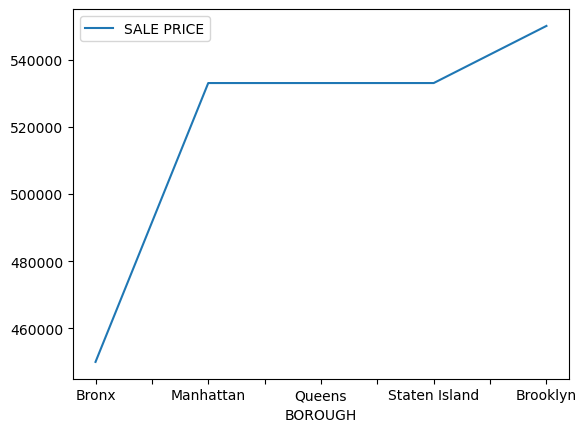

In [46]:
median_price.plot(kind="line")

### Kesimpulan:

Berdasarakan hasil tabel dan garfik diatas

Dapat disimpulkan :
 - SALE PRICE tertinggi diraih oleh BOROUGH  `Brooklyn`
 - SALE PRICE terendah diraih oleh BOROUGH `Bronx`

### Measure of Central Tendency: Modus

         BOROUGH  TOTAL UNITS
0      Manhattan          1.0
1          Bronx          2.0
2       Brooklyn          1.0
3         Queens          1.0
4  Staten Island          1.0


<Axes: >

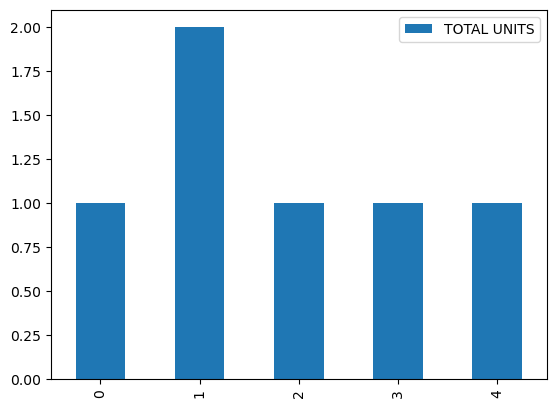

In [47]:
#Menghitung nilai modus TOTAL UNIT pada setiap data di kolom BOROUGH
modus_price = df[['BOROUGH','TOTAL UNITS']].groupby(['BOROUGH']).apply(pd.DataFrame.mode).reset_index(drop=True)
print(modus_price)
modus_price.plot(kind='bar')

### Kesimpulan:

Dari tabel dan grafik di atas dapat disimpulkan bahwa :
BOROUGH`Bronx` memiliki sebagian besar 2 total unit, sedangkan BOROUGH `Manhattan`, BOROUGH `Staten Island`, BOROUGH `Brooklyn`, dan BOROUGH `Queens`sebagian besar memiliki 1 total unit.

### Measure of Spread : Range

BOROUGH
Manhattan        691680.0
Bronx            697500.0
Brooklyn         698326.0
Queens           698634.0
Staten Island    698300.0
dtype: float64


<Axes: xlabel='BOROUGH'>

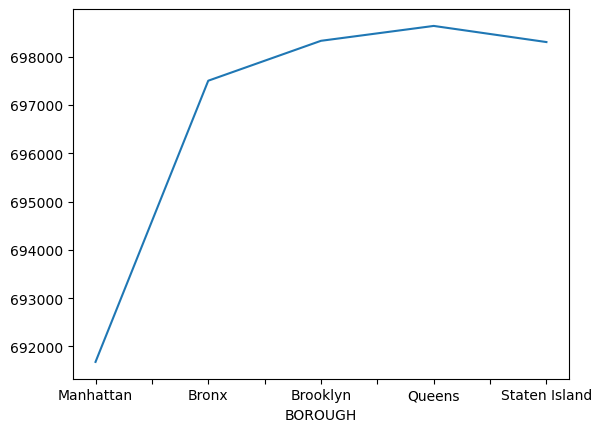

In [48]:
#Menghitung nilai range SALE PRICE pada setiap data di kolom BOROUGH
range_price = df.groupby('BOROUGH').apply(lambda x: x['SALE PRICE'].max() - x['SALE PRICE'].min())
print(range_price)
range_price.plot(kind='line')

### Kesimpulan:

Berdasarkan tabel dan plot di atas, dapat disimpulkan bahwa :
- nilai range pada semua kota tidak jauh berbeda, yaitu berada pada kisaran 690000
- range tertinggi ada pada BOROUGH `Queens`
- range terendah ada pada BOROUGH `Manhattan`

### Measure of Spread : Variance

In [49]:
#Menghitung nilai variance pada setiap data di kolom BOROUGH
var_all = df.groupby('BOROUGH').var()
var_all

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6304\2747115265.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  var_all = df.groupby('BOROUGH').var()


,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,3.142175e+05,717910.228171,1350.462548,168.305338,1529.207301,5.069350e+07,3.318655e+09,6.686725e+09
Bronx,8.998643e+05,70474.574189,73.524841,0.072382,73.509857,8.828127e+06,5.613665e+07,2.292858e+10
Brooklyn,6.275066e+06,291303.238775,42.074012,0.124197,42.154008,2.533582e+08,7.328386e+07,2.853781e+10
Queens,1.970488e+07,227306.659603,550.275505,335.528177,895.808833,2.417852e+09,1.953598e+09,1.558957e+10
Staten Island,5.119743e+06,204110.845412,3.765226,2.375221,6.028134,7.767154e+08,7.213998e+07,1.781652e+10


### Kesimpulan:
Dari tabel di atas,  diketahui bahwa sebagian besar kota memiliki nilai varians yang tinggi, artinya data memiliki distribusi yang besar.

### Measure of Spread : Standard Deviation

In [51]:
#Menghitung nilai standar deviasi pada setiap data di kolom BOROUGH
std_all = df.groupby('BOROUGH').std()
std_all

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6304\3684064534.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_all = df.groupby('BOROUGH').std()


,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,560.551027,847.295833,36.748640,12.973255,39.105080,7119.937134,57607.771999,81772.396199
Bronx,948.611759,265.470477,8.574663,0.269039,8.573789,2971.216482,7492.439587,151421.869236
Brooklyn,2505.008121,539.725151,6.486448,0.352416,6.492612,15917.228446,8560.599356,168931.371636
Queens,4439.017348,476.766882,23.457952,18.317428,29.930066,49171.654954,44199.529479,124858.189065
Staten Island,2262.684895,451.786283,1.940419,1.541175,2.455226,27869.614505,8493.525502,133478.522279


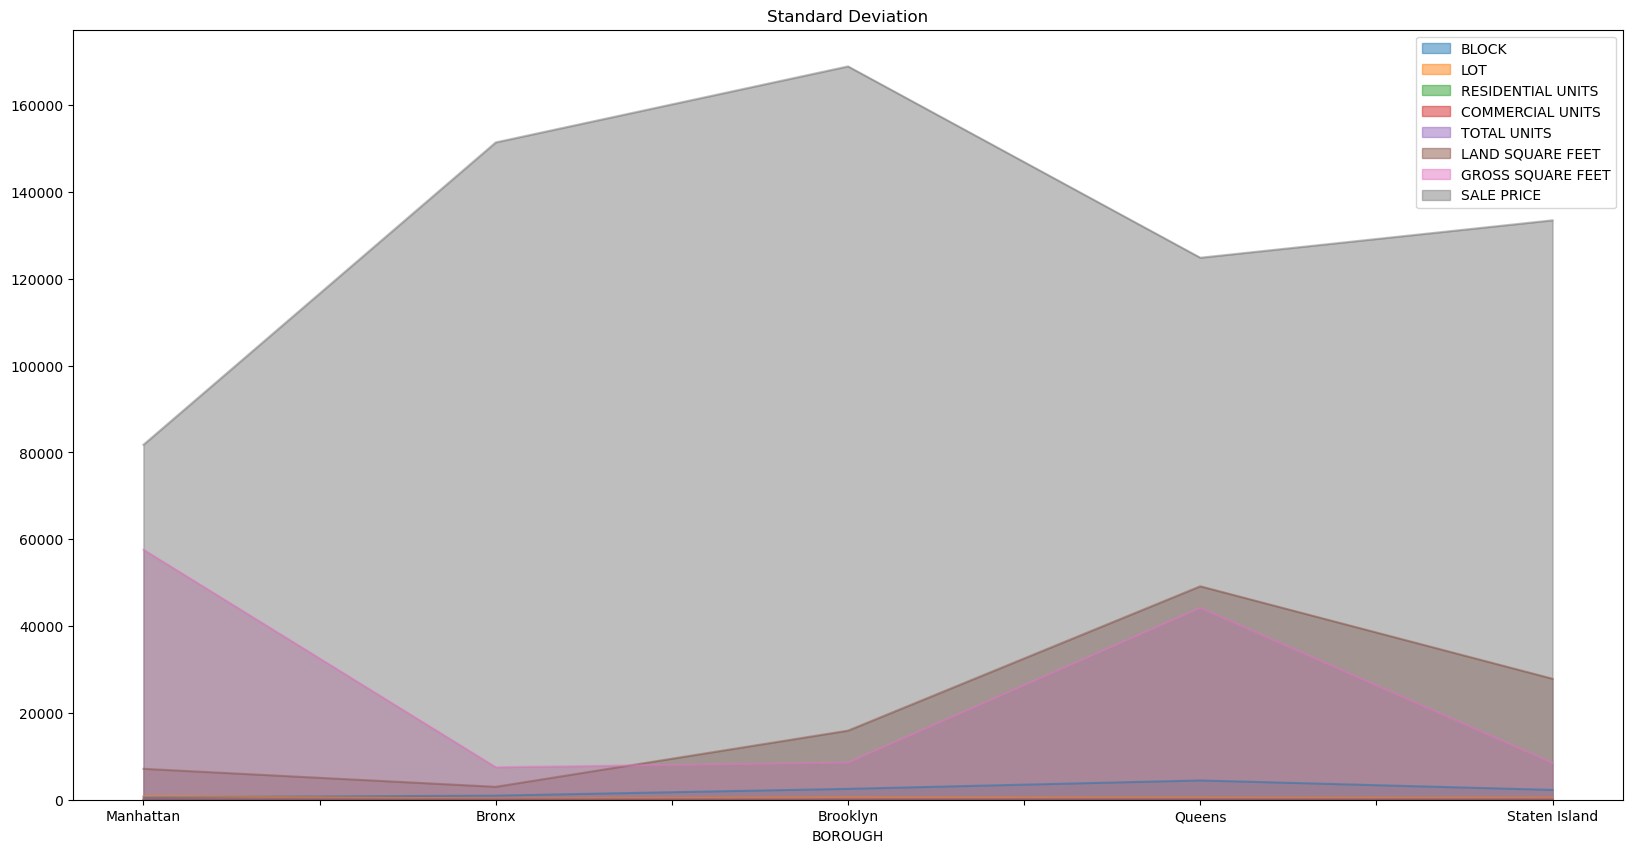

In [52]:
std_all.plot(kind ='area',
             stacked = False,
             figsize = (20, 10))

plt.title('Standard Deviation')
plt.ylabel('')
plt.xlabel('BOROUGH')

plt.show()

### Kesimpulan:

Dari tabel di atas, dapat disimpulkan bahwa 
- sebagian besar kota memiliki nilai standar deviasi yang tinggi, artinya data memiliki distribusi yang besar
- BOROUGH `Brooklyn` memiliki nilai SALE PRICE yang tinggi yaitu 168931.371636
- BOROUGH `Queens`  memiliki nilai BLOCK, COMMERCIAL UNITS, dan LAND SQUARE FEET yang paling tinggi

## Probability Distribution

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6304\2772544709.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(br['SALE PRICE'],


[Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Probability of Occurence'),
 Text(0.5, 1.0, 'Distribution of Sale Price in Brooklyn')]

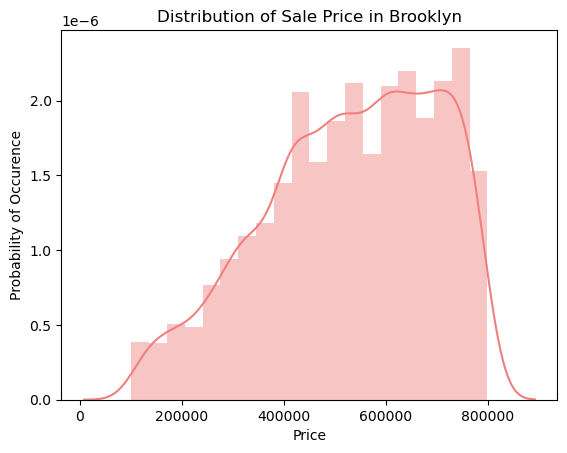

In [53]:
#Membuat probability distribution Bronx di kolom SALE PRICE 
df1 = df.groupby("BOROUGH")
br = df1.get_group('Brooklyn')

ax = sns.distplot(br['SALE PRICE'],
                  kde=True,
                  bins=20,
                  color='lightcoral',
                  hist_kws={"linewidth": 15,'alpha':0.45})

ax.set(xlabel='Price', 
       ylabel='Probability of Occurence', 
       title='Distribution of Sale Price in Brooklyn')

### Kesimpulan:

Dari plot distribusi di atas, dapat diketahui bahwa SALE PRICE Brooklyn mengikuti distribusi binomial. Plot distribusi miring ke kanan yang artinya, nilai - nilai observasi berfrekuensi rendah lebih banyak berada di sebelah kanan dari rata - rata. Jadi probabilitasnya untuk sukses.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6304\3247667482.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(br['SALE PRICE'],


[Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Probability of Occurence'),
 Text(0.5, 1.0, 'Distribution of Sale Price in Bronx')]

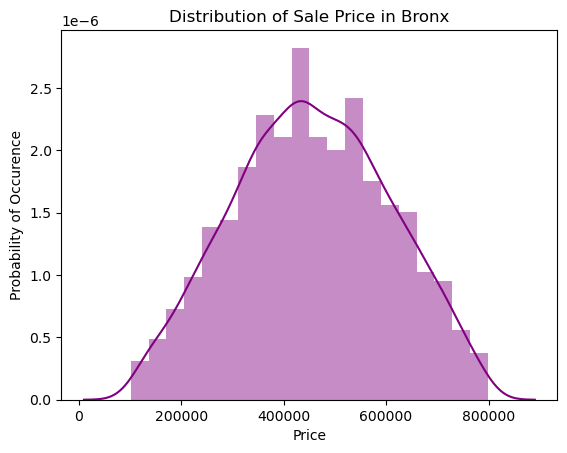

In [54]:
#Membuat probability distribution Bronx di kolom SALE PRICE 
df1 = df.groupby("BOROUGH")
br = df1.get_group('Bronx')

ax = sns.distplot(br['SALE PRICE'],
                  kde=True,
                  bins=20,
                  color='purple',
                  hist_kws={"linewidth": 15,'alpha':0.45})

ax.set(xlabel='Price', 
       ylabel='Probability of Occurence', 
       title='Distribution of Sale Price in Bronx')

### Kesimpulan:

Dari plot distribusi di atas, dapat diketahui bahwa SALE PRICE Bronx mengikuti distribusi normal. Secara umum plot distribusi normal berbentuk mirip dengan lonceng.

## Confidence Interval

In [55]:
#Menampilkan mean, standard deviation, dan population size dari SALE PRICE
ci=df.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})
ci

SALE PRICE                      
                        mean            std   size
BOROUGH                                           
Manhattan      551868.071038   81772.396199   3111
Bronx          454719.496226  151421.869236   3047
Brooklyn       531021.716746  168931.371636   4819
Queens         518863.461569  124858.189065  15248
Staten Island  479749.732431  133478.522279   7015

In [56]:
#Mengekstrak parameter yang diperlukan
mean_sp = ci.iloc[0,0]
sd = ci.iloc [0,1]
n = ci.iloc [0,2]         
z = 1.96   

In [57]:
#Menghitung standard error 
se = sd / np.sqrt(n)

In [58]:
#Membangun CI
lcb = mean_sp - z * se
ucb = mean_sp + z * se
lcb, ucb

(548994.5605278267, 554741.5815486761)

Artinya rata-rata sebenarnya dari SALE PRICE di Manhattan akan jatuh antara 548994.5605278267 dan 554741.5815486761

## Hypothesis Testing

Menguji apakah sampel data memiliki distribusi Gaussian.

Asumsi:
- Pengamatan di setiap sampel independen dan terdistribusi secara identik.

Interpretasi
- H0: Sampel memiliki distribusi Gaussian
- H1: Sampel tidak memiliki distribusi Gaussian

In [59]:
import statsmodels.api as sm

### Shapiro-Wilk Test

In [60]:
from scipy.stats import pearsonr
df1 = df.groupby("BOROUGH")
mh = df1.get_group('Manhattan')
sp = mh['SALE PRICE']

from scipy.stats import shapiro
stat, p = shapiro(sp)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.629, p=0.000
Probably not Gaussian


### D'Agostino's K^2 Test

In [61]:
from scipy.stats import pearsonr
df1 = df.groupby("BOROUGH")
br = df1.get_group('Bronx')
sp1 = br['SALE PRICE']

from scipy.stats import normaltest
stat, p = normaltest(sp1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=124.810, p=0.000
Probably not Gaussian


### Anderson-Darling Test

In [62]:
from scipy.stats import pearsonr
df1 = df.groupby("BOROUGH")
brok = df1.get_group('Brooklyn')
sp2 = brok['SALE PRICE']

from scipy.stats import anderson
results = anderson(sp2)
print('stat=%.3f' % (results.statistic))
for i in range(len(results.critical_values)):
      sl, cv = results.significance_level[i], results.critical_values[i]
      if results.statistic < cv:
          print('Probably Gaussian at the %.1f%% level' % (sl))
      else:
          print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=39.849
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


### Kesimpulan : 
Berdasarkan pengujian didapatkan p-value < 0,05 sehingga H0 ditolak yang berarti sampel data tidak berdistribusi Gaussian.

## Kesimpulan

Berdasarkan hasil pengerjaan diatas dapat disimpulkan bahwa :

1. Berdasarkan data, mean (Rata - rata), Rata rata  tertinggi terdapat pada Manhattan, yaitu 551868.
2. Berdasarkan data Median ( nilai tengah ), median tertinggi terdapat pada kota Brooklyn, yaitu 550000 dan median terendah terdapat pada kota Bronx.
3. Berdasarkan data, Bronx memiliki sebagian besar 2 total unit, sedangkan borough lainnya sebagian besar memiliki 1 total unit.
4. Berdasarkan data, Range pada semua kota tidak jauh berbeda, yaitu berkisar di angka 690000.
5. Berdasarkan data,Sebagian besar kota memiliki nilai varians yang tinggi, artinya data memiliki distribusi yang besar.
6. Berdasarkan pengujian hipotesis, didapatkan p-value < 0.05 sehingga sampel tidak berdistribusi Gaussian.